# New Orleans Crime Stats for 2018-2022
---
## Import, Merge Libraries and Load Crime Statistics

This notebook combines datasets for all of the Police Reports filed by NOPD officers including incident and supplemental reports containing the item number, location, disposition, signal, charges, offender race, offender gender, offender age, victim age, victim gender, and victim race between 2018-2022.  

- The year of 2018 (64,403) averages the highest amount of filed police reports, whereas 2022 (48,445) is the lowest for the dataset covering 2018-2022. 

- The month of May (25,377) averages the highest amount of filed police reports, whereas December (18,714) is the lowest for the dataset covering 2018-2022.

- The hour of 12:00 (16,053) averages the highest amount of filed police reports, whereas 06:00 (5,790) is the lowest for the dataset covering 2018-2022. 

- The day of the week Sunday (41,378) averages the highest amount of filed police reports, whereas Thursday (37,920) is the lowest for the dataset covering 2018-2022. 
 
The month of May averaged the highest amount of crime between 2018-2022 and was selected in order to compare and verify if the number of criminal reporting changed during COVID-19, where lockdowns occurred throughout the U.S. mid-March 2020,(https://www.cdc.gov/museum/timeline/covid19.html). 

Our findings revealed a decrease in criminal events in May of 2020 (4,212), which is a decrease from 2018 (5,700), 2019 (6,037); however, the years 2021 (5,072) and 2022 (4,356) were lower than pre-pandemic numbers for the month of May. The line chart shows a steady decrease during and post COVID-19. District 7 still remained as the predominant volume for filed police reports. The hours appear to remain consistent at 12:00 (1,446) with the highest amount of filed police reports, whereas 06:00 (543) is the lowest for the dataset covering for the month of May (2018-2022). Sundays (3,827) remain the highest amount of filed police reports, whereas Friday (3,468) is the lowest for the month of May (2018-2022).

Althoug, our initial findings revealed a decrease in criminal reporting in the city of New Orleans during COVID-19; however, further analysis is needed to gain a better understanding of criminal activity trends.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
#import glob as glb for ingesting numerous csv files
from glob import glob
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Import police 2018-2022 csv files https://www.youtube.com/watch?v=-0B6K1hYNgU
police_reports = sorted(glob("Resources/police*.csv"))
police_reports

['Resources/police2018.csv',
 'Resources/police2019.csv',
 'Resources/police2020.csv',
 'Resources/police2021.csv',
 'Resources/police2022.csv']

In [40]:
# Merge the police reports and name sourcefile as datafile 
merged_police_reports = pd.concat(pd.read_csv(datafile).assign(sourcefilename = datafile)
    for datafile in police_reports)

In [41]:
# Check the data
merged_police_reports

,Item_Number,Year,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,...,Victim_Number,Victim_Fatal_Status,Hate_Crime,Report_Type,sourcefilename,OffenderID,OffenderStatus,PersonType,Hate Crime,Report Type
0,D-23482-18,2018,6,23XX Milan St,CLOSED,67,THEFT,4/20/18 7:32,54 186,THEFT,...,1.0,Non-fatal,NaN,Supplemental Report,Resources/police2018.csv,NaN,NaN,NaN,NaN,NaN
1,E-13975-18,2018,4,45XX Macarthur Bd 69,OPEN,27-29S,ATTEMPTED SUICIDE,5/11/18 16:19,NaN,NaN,...,1.0,Non-fatal,NaN,Incident Report,Resources/police2018.csv,NaN,NaN,NaN,NaN,NaN
2,D-34501-18,2018,3,63XX Elysian Fields St,CLOSED,37,AGGRAVATED ASSAULT,4/28/18 23:50,40 966,PROHIBITED ACTS--SCHEDULE I DRUGS,...,1.0,Non-fatal,NaN,Incident Report,Resources/police2018.csv,NaN,NaN,NaN,NaN,NaN
3,E-12091-18,2018,8,15XX Pauger St,OPEN,67,THEFT,5/10/18 3:30,14 67,THEFT,...,1.0,Non-fatal,NaN,Incident Report,Resources/police2018.csv,NaN,NaN,NaN,NaN,NaN
4,I-29004-18,2018,5,9XX Mandeville St,OPEN,21,MISCELLANEOUS INCIDENT,9/23/18 11:30,NaN,NaN,...,1.0,Non-fatal,NaN,Incident Report,Resources/police2018.csv,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93003,J-09114-22,2022,7,066XX N I-10 Service Rd,OPEN,64J,ARMED CARJACKING,10/9/22 21:52,14 64.2,CARJACKING,...,1.0,Non-fatal,NaN,NaN,Resources/police2022.csv,780283.0,NaN,VICTIM,NaN,Incident Report
93004,J-08958-22,2022,5,021XX Painters St,OPEN,67A,AUTO THEFT,10/9/22 16:00,14 67.26,THEFT OF A MOTOR VEHICLE,...,1.0,Non-fatal,NaN,NaN,Resources/police2022.csv,780284.0,NaN,VICTIM,NaN,Supplemental Report
93005,J-08958-22,2022,5,021XX Painters St,OPEN,67A,AUTO THEFT,10/9/22 16:00,14 56,SIMPLE CRIMINAL DAMAGE TO PROPERTY,...,1.0,Non-fatal,NaN,NaN,Resources/police2022.csv,780284.0,NaN,VICTIM,NaN,Supplemental Report
93006,J-09180-22,2022,4,029XX Sabine St,OPEN,103D,DISTURBANCE (DOMESTIC),10/10/22 0:34,NaN,NaN,...,1.0,Non-fatal,NaN,NaN,Resources/police2022.csv,NaN,NaN,REPORTING PERSON,NaN,Incident Report


In [42]:
# Count the number of Item Numbers
item_count = merged_police_reports["Item_Number"].nunique()
item_count

311782

In [43]:
# Drop the duplicates and keep the first value, use inplace True
deduped_crime = merged_police_reports.drop_duplicates(subset=["Item_Number"], keep="first", inplace=False)
#deduped_crime = crime_2018
deduped_crime

,Item_Number,Year,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,...,Victim_Number,Victim_Fatal_Status,Hate_Crime,Report_Type,sourcefilename,OffenderID,OffenderStatus,PersonType,Hate Crime,Report Type
0,D-23482-18,2018,6,23XX Milan St,CLOSED,67,THEFT,4/20/18 7:32,54 186,THEFT,...,1.0,Non-fatal,NaN,Supplemental Report,Resources/police2018.csv,NaN,NaN,NaN,NaN,NaN
1,E-13975-18,2018,4,45XX Macarthur Bd 69,OPEN,27-29S,ATTEMPTED SUICIDE,5/11/18 16:19,NaN,NaN,...,1.0,Non-fatal,NaN,Incident Report,Resources/police2018.csv,NaN,NaN,NaN,NaN,NaN
2,D-34501-18,2018,3,63XX Elysian Fields St,CLOSED,37,AGGRAVATED ASSAULT,4/28/18 23:50,40 966,PROHIBITED ACTS--SCHEDULE I DRUGS,...,1.0,Non-fatal,NaN,Incident Report,Resources/police2018.csv,NaN,NaN,NaN,NaN,NaN
3,E-12091-18,2018,8,15XX Pauger St,OPEN,67,THEFT,5/10/18 3:30,14 67,THEFT,...,1.0,Non-fatal,NaN,Incident Report,Resources/police2018.csv,NaN,NaN,NaN,NaN,NaN
4,I-29004-18,2018,5,9XX Mandeville St,OPEN,21,MISCELLANEOUS INCIDENT,9/23/18 11:30,NaN,NaN,...,1.0,Non-fatal,NaN,Incident Report,Resources/police2018.csv,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92998,J-08924-22,2022,5,054XX N Robertson St,OPEN,67,THEFT,10/9/22 17:31,14 67,THEFT,...,1.0,Non-fatal,NaN,NaN,Resources/police2022.csv,780286.0,NaN,VICTIM,NaN,Incident Report
93001,J-09114-22,2022,7,066XX N I-10 Service Rd,OPEN,64J,ARMED CARJACKING,10/9/22 21:52,14 64.2,CARJACKING,...,1.0,Non-fatal,NaN,NaN,Resources/police2022.csv,780281.0,NaN,VICTIM,NaN,Incident Report
93004,J-08958-22,2022,5,021XX Painters St,OPEN,67A,AUTO THEFT,10/9/22 16:00,14 67.26,THEFT OF A MOTOR VEHICLE,...,1.0,Non-fatal,NaN,NaN,Resources/police2022.csv,780284.0,NaN,VICTIM,NaN,Supplemental Report
93006,J-09180-22,2022,4,029XX Sabine St,OPEN,103D,DISTURBANCE (DOMESTIC),10/10/22 0:34,NaN,NaN,...,1.0,Non-fatal,NaN,NaN,Resources/police2022.csv,NaN,NaN,REPORTING PERSON,NaN,Incident Report


In [44]:
# Remove Miscellaneous Incident from the Signal_Description column
clean_signal =deduped_crime.loc[~deduped_crime["Signal_Description"].str.contains("MISCELLANEOUS INCIDENT")]
clean_signal.head()

,Item_Number,Year,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,...,Victim_Number,Victim_Fatal_Status,Hate_Crime,Report_Type,sourcefilename,OffenderID,OffenderStatus,PersonType,Hate Crime,Report Type
0,D-23482-18,2018,6,23XX Milan St,CLOSED,67,THEFT,4/20/18 7:32,54 186,THEFT,...,1.0,Non-fatal,NaN,Supplemental Report,Resources/police2018.csv,NaN,NaN,NaN,NaN,NaN
1,E-13975-18,2018,4,45XX Macarthur Bd 69,OPEN,27-29S,ATTEMPTED SUICIDE,5/11/18 16:19,NaN,NaN,...,1.0,Non-fatal,NaN,Incident Report,Resources/police2018.csv,NaN,NaN,NaN,NaN,NaN
2,D-34501-18,2018,3,63XX Elysian Fields St,CLOSED,37,AGGRAVATED ASSAULT,4/28/18 23:50,40 966,PROHIBITED ACTS--SCHEDULE I DRUGS,...,1.0,Non-fatal,NaN,Incident Report,Resources/police2018.csv,NaN,NaN,NaN,NaN,NaN
3,E-12091-18,2018,8,15XX Pauger St,OPEN,67,THEFT,5/10/18 3:30,14 67,THEFT,...,1.0,Non-fatal,NaN,Incident Report,Resources/police2018.csv,NaN,NaN,NaN,NaN,NaN
5,D-13290-18,2018,5,19XX N Tonti St,CLOSED,966,DRUG LAW VIOLATION,4/11/18 12:30,14 95.1,POSSESSION OF FIREARM BY FELON,...,1.0,Non-fatal,NaN,Incident Report,Resources/police2018.csv,NaN,NaN,NaN,NaN,NaN


In [45]:
# Select columns of interest from the DataFrame and save the new DataFrame
# Selected: "Item_Number", "Year", "District", "Signal_Description", "Occurred_Date_Time", & "Offender_Gender". 
reduced_crime_df = clean_signal[["Item_Number", "Year", "District", "Signal_Type","Signal_Description", "Occurred_Date_Time", 
                       "Offender_Gender", "Victim_Fatal_Status"]]
reduced_crime_df.head()

,Item_Number,Year,District,Signal_Type,Signal_Description,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
0,D-23482-18,2018,6,67,THEFT,4/20/18 7:32,MALE,Non-fatal
1,E-13975-18,2018,4,27-29S,ATTEMPTED SUICIDE,5/11/18 16:19,NaN,Non-fatal
2,D-34501-18,2018,3,37,AGGRAVATED ASSAULT,4/28/18 23:50,MALE,Non-fatal
3,E-12091-18,2018,8,67,THEFT,5/10/18 3:30,MALE,Non-fatal
5,D-13290-18,2018,5,966,DRUG LAW VIOLATION,4/11/18 12:30,MALE,Non-fatal


In [46]:
reduced_crime_df["Occurred_Date_Time"] = pd.to_datetime(reduced_crime_df.Occurred_Date_Time)
reduced_crime_df.head()                                                       

,Item_Number,Year,District,Signal_Type,Signal_Description,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
0,D-23482-18,2018,6,67,THEFT,2018-04-20 07:32:00,MALE,Non-fatal
1,E-13975-18,2018,4,27-29S,ATTEMPTED SUICIDE,2018-05-11 16:19:00,NaN,Non-fatal
2,D-34501-18,2018,3,37,AGGRAVATED ASSAULT,2018-04-28 23:50:00,MALE,Non-fatal
3,E-12091-18,2018,8,67,THEFT,2018-05-10 03:30:00,MALE,Non-fatal
5,D-13290-18,2018,5,966,DRUG LAW VIOLATION,2018-04-11 12:30:00,MALE,Non-fatal


In [47]:
# Look at the data types.
reduced_crime_df.dtypes


Item_Number                    object
Year                            int64
District                        int64
Signal_Type                    object
Signal_Description             object
Occurred_Date_Time     datetime64[ns]
Offender_Gender                object
Victim_Fatal_Status            object
dtype: object

In [48]:
# Crime per specific hours https://www.youtube.com/watch?v=yCgJGsg0Xa4
hour_count = reduced_crime_df.Occurred_Date_Time.dt.hour
hour_count.value_counts()

12    16053
0     14057
1     13988
11    13500
15    13362
17    13133
10    13081
16    13030
20    12951
19    12729
18    12634
2     12608
21    12338
23    12062
13    11398
9     11276
14    11209
3     10939
22    10738
8     10017
4      8185
7      7805
5      6109
6      5790
Name: Occurred_Date_Time, dtype: int64

In [49]:
# Crime per weekday https://www.youtube.com/watch?v=yCgJGsg0Xa4, note day of week 0 = Monday, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html
weekday_count = reduced_crime_df.Occurred_Date_Time.dt.weekday
weekday_count.value_counts()

6    41378
0    41109
5    41036
4    39462
1    39310
2    38777
3    37920
Name: Occurred_Date_Time, dtype: int64

In [50]:
##### Crime per month https://www.youtube.com/watch?v=yCgJGsg0Xa4, note day of week 0 = Monday, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html
month_count = reduced_crime_df.Occurred_Date_Time.dt.month_name()
month_count.value_counts()

May          25377
March        24205
October      24173
July         24120
August       23815
June         23767
April        23508
February     23182
September    23080
November     22667
January      22384
December     18714
Name: Occurred_Date_Time, dtype: int64

In [51]:
# Crime per weekday https://www.youtube.com/watch?v=yCgJGsg0Xa4
yearly_counts = reduced_crime_df.Occurred_Date_Time.dt.year
yearly_counts.value_counts()

2018    64403
2019    62021
2020    52533
2021    51590
2022    48445
Name: Occurred_Date_Time, dtype: int64

In [52]:
%matplotlib inline

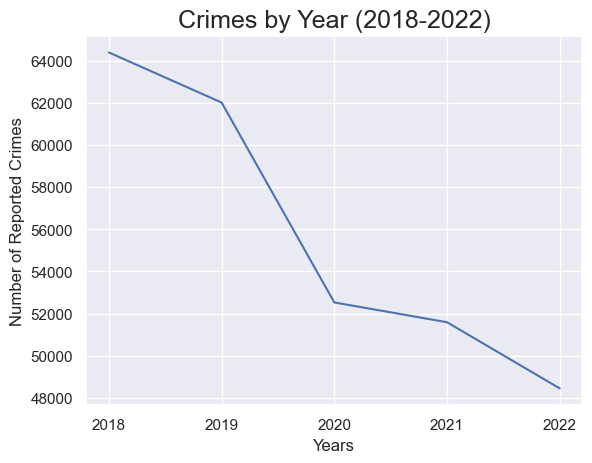

In [53]:
# Line plot for the number of crimes reported between 2018-2022. https://www.youtube.com/watch?v=yCgJGsg0Xa4
reduced_crime_df.Year.value_counts().sort_index().plot()
sns.set(style = 'darkgrid')
plt.xticks(np.arange(2018, 2023))
plt.title("Crimes by Year (2018-2022)", fontsize=18)
plt.xlabel("Years")
plt.ylabel("Number of Reported Crimes")
plt.savefig("output_data/yearly_combined.png")

In [54]:
# Create a new column in the dataframe called day count
reduced_crime_df["Day_Of_Week"] = reduced_crime_df.Occurred_Date_Time.dt.day_name()
reduced_crime_df.head()

,Item_Number,Year,District,Signal_Type,Signal_Description,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status,Day_Of_Week
0,D-23482-18,2018,6,67,THEFT,2018-04-20 07:32:00,MALE,Non-fatal,Friday
1,E-13975-18,2018,4,27-29S,ATTEMPTED SUICIDE,2018-05-11 16:19:00,NaN,Non-fatal,Friday
2,D-34501-18,2018,3,37,AGGRAVATED ASSAULT,2018-04-28 23:50:00,MALE,Non-fatal,Saturday
3,E-12091-18,2018,8,67,THEFT,2018-05-10 03:30:00,MALE,Non-fatal,Thursday
5,D-13290-18,2018,5,966,DRUG LAW VIOLATION,2018-04-11 12:30:00,MALE,Non-fatal,Wednesday


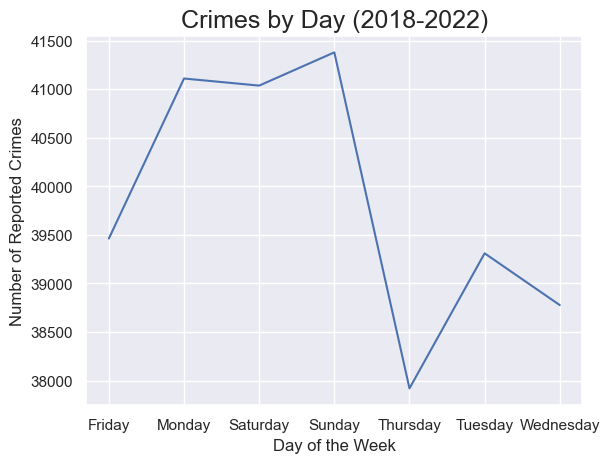

In [55]:
# Line plot for the number of crimes reported between 2018-2022. https://www.youtube.com/watch?v=yCgJGsg0Xa4
reduced_crime_df.Day_Of_Week.value_counts().sort_index().plot()
sns.set(style = 'darkgrid')
plt.title("Crimes by Day (2018-2022)", fontsize=18)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Reported Crimes")
plt.savefig("output_data/daily_combined.png")

In [56]:
# Create a new column in the dataframe called hour.
reduced_crime_df["Hour"] = reduced_crime_df.Occurred_Date_Time.dt.hour
reduced_crime_df.head()

,Item_Number,Year,District,Signal_Type,Signal_Description,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status,Day_Of_Week,Hour
0,D-23482-18,2018,6,67,THEFT,2018-04-20 07:32:00,MALE,Non-fatal,Friday,7
1,E-13975-18,2018,4,27-29S,ATTEMPTED SUICIDE,2018-05-11 16:19:00,NaN,Non-fatal,Friday,16
2,D-34501-18,2018,3,37,AGGRAVATED ASSAULT,2018-04-28 23:50:00,MALE,Non-fatal,Saturday,23
3,E-12091-18,2018,8,67,THEFT,2018-05-10 03:30:00,MALE,Non-fatal,Thursday,3
5,D-13290-18,2018,5,966,DRUG LAW VIOLATION,2018-04-11 12:30:00,MALE,Non-fatal,Wednesday,12


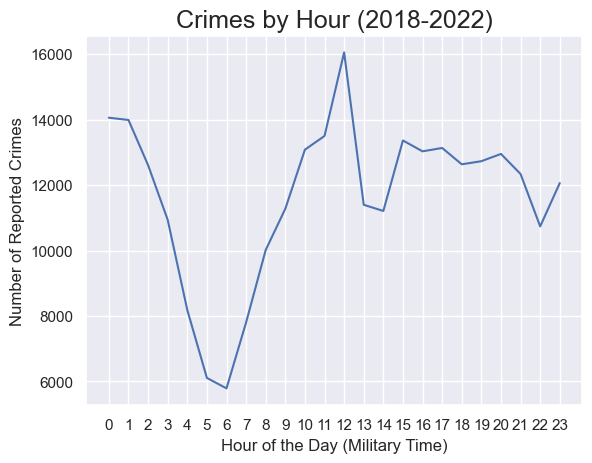

In [57]:
# Line plot for the number of crimes reported between 2018-2022. https://www.youtube.com/watch?v=yCgJGsg0Xa4 & https://www.youtube.com/watch?v=l-j9Mmi7VPk
reduced_crime_df.Hour.value_counts().sort_index().plot()
sns.set(style = 'darkgrid')
plt.xticks(np.arange(0, 24))
plt.title("Crimes by Hour (2018-2022)", fontsize=18)
plt.xlabel("Hour of the Day (Military Time)")
plt.ylabel("Number of Reported Crimes")
plt.savefig("output_data/hourly_combined.png")

In [58]:
# Create a new column in the dataframe called hour.
reduced_crime_df["Month"] = reduced_crime_df.Occurred_Date_Time.dt.month_name()
reduced_crime_df.to_csv("output_data/top_month.csv")
reduced_crime_df.head()

,Item_Number,Year,District,Signal_Type,Signal_Description,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status,Day_Of_Week,Hour,Month
0,D-23482-18,2018,6,67,THEFT,2018-04-20 07:32:00,MALE,Non-fatal,Friday,7,April
1,E-13975-18,2018,4,27-29S,ATTEMPTED SUICIDE,2018-05-11 16:19:00,NaN,Non-fatal,Friday,16,May
2,D-34501-18,2018,3,37,AGGRAVATED ASSAULT,2018-04-28 23:50:00,MALE,Non-fatal,Saturday,23,April
3,E-12091-18,2018,8,67,THEFT,2018-05-10 03:30:00,MALE,Non-fatal,Thursday,3,May
5,D-13290-18,2018,5,966,DRUG LAW VIOLATION,2018-04-11 12:30:00,MALE,Non-fatal,Wednesday,12,April


In [59]:
# Create a new column in the dataframe called hour.
reduced_crime_df["Month_Num"] = reduced_crime_df.Occurred_Date_Time.dt.month
reduced_crime_df.to_csv("output_data/top_month.csv")
reduced_crime_df.head()

,Item_Number,Year,District,Signal_Type,Signal_Description,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status,Day_Of_Week,Hour,Month,Month_Num
0,D-23482-18,2018,6,67,THEFT,2018-04-20 07:32:00,MALE,Non-fatal,Friday,7,April,4
1,E-13975-18,2018,4,27-29S,ATTEMPTED SUICIDE,2018-05-11 16:19:00,NaN,Non-fatal,Friday,16,May,5
2,D-34501-18,2018,3,37,AGGRAVATED ASSAULT,2018-04-28 23:50:00,MALE,Non-fatal,Saturday,23,April,4
3,E-12091-18,2018,8,67,THEFT,2018-05-10 03:30:00,MALE,Non-fatal,Thursday,3,May,5
5,D-13290-18,2018,5,966,DRUG LAW VIOLATION,2018-04-11 12:30:00,MALE,Non-fatal,Wednesday,12,April,4


In [60]:
reduced_crime_df.Occurred_Date_Time.dt.month_name()
reduced_crime_df.value_counts()

Item_Number  Year  District  Signal_Type  Signal_Description         Occurred_Date_Time   Offender_Gender  Victim_Fatal_Status  Day_Of_Week  Hour  Month     Month_Num
A-00007-21   2021  8         35D          SIMPLE BATTERY (DOMESTIC)  2021-01-01 00:30:00  MALE             Non-fatal            Friday       0     January   1            1
H-41761-19   2019  4         100          HIT AND RUN                2019-08-30 11:53:00  MALE             Non-fatal            Friday       11    August    8            1
H-42333-19   2019  7         67F          THEFT BY FRAUD             2019-08-30 15:00:00  FEMALE           Non-fatal            Friday       15    August    8            1
H-42289-19   2019  1         966          DRUG LAW VIOLATION         2019-08-30 20:04:00  MALE             Non-fatal            Friday       20    August    8            1
H-42277-19   2019  2         67           THEFT                      2019-08-30 10:48:00  MALE             Non-fatal            Friday       10  

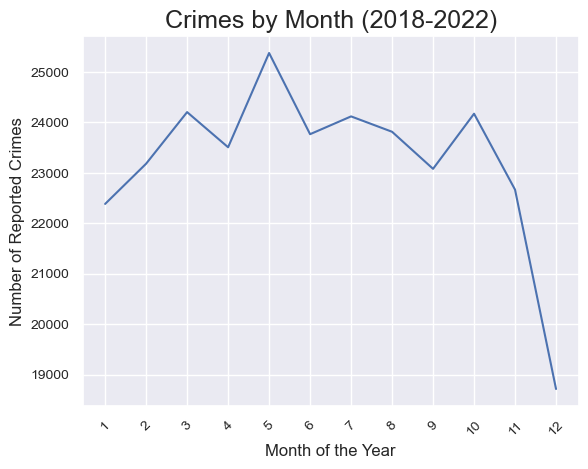

In [61]:
# Line plot for the number of crimes reported between 2018-2022. https://www.youtube.com/watch?v=yCgJGsg0Xa4 & https://www.youtube.com/watch?v=l-j9Mmi7VPk
reduced_crime_df.Month_Num.value_counts().sort_index().plot()
sns.set(style = 'darkgrid')
plt.xticks(np.arange(1, 13))
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Crimes by Month (2018-2022)", fontsize=18)
plt.xlabel("Month of the Year", fontsize=12)
plt.ylabel("Number of Reported Crimes", fontsize=12)
plt.savefig("output_data/monthly_combined.png")

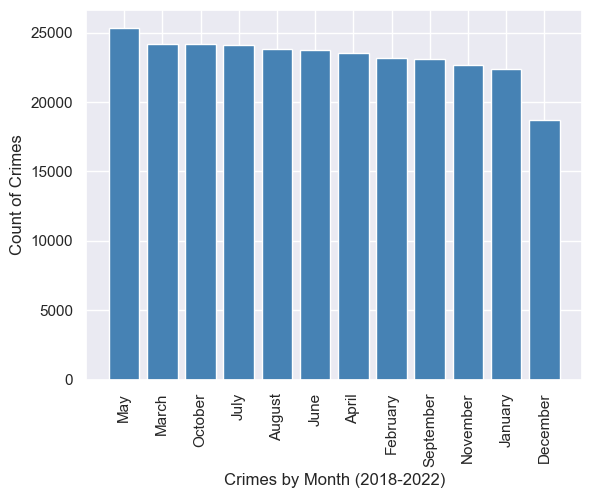

In [62]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
month_rows = reduced_crime_df["Month"].value_counts() 
x_axis = month_rows.index.values
y_axis = month_rows.values

# This creates and center the pyplot bar plot
plt.bar(x_axis, y_axis, color="steelblue", align="center")
plt.xlabel("Crimes by Month (2018-2022)")
plt.ylabel("Count of Crimes")
# This formats the x label vertically
plt.xticks(rotation="vertical")
plt.show()

In [63]:
# Based on the findings, the month of May averages the hightest amount of crime for this dataset. 
may_month= reduced_crime_df.loc[reduced_crime_df["Month"] == "May"]
may_month

,Item_Number,Year,District,Signal_Type,Signal_Description,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status,Day_Of_Week,Hour,Month,Month_Num
1,E-13975-18,2018,4,27-29S,ATTEMPTED SUICIDE,2018-05-11 16:19:00,NaN,Non-fatal,Friday,16,May,5
3,E-12091-18,2018,8,67,THEFT,2018-05-10 03:30:00,MALE,Non-fatal,Thursday,3,May,5
10,E-06707-18,2018,3,56,SIMPLE CRIMINAL DAMAGE,2018-05-05 20:00:00,NaN,Non-fatal,Saturday,20,May,5
11,E-07458-18,2018,7,67S,SHOPLIFTING,2018-05-06 18:35:00,MALE,Non-fatal,Sunday,18,May,5
12,E-10313-18,2018,8,95G,ILLEGAL CARRYING OF A GUN,2018-05-09 00:00:00,MALE,Non-fatal,Wednesday,0,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...
90591,G-06665-22,2022,1,67A,AUTO THEFT,2022-05-18 17:00:00,NaN,Non-fatal,Wednesday,17,May,5
90653,E-03108-22,2022,7,67A,AUTO THEFT,2022-05-03 16:25:00,NaN,Non-fatal,Tuesday,16,May,5
91428,E-21949-22,2022,6,35D,SIMPLE BATTERY (DOMESTIC),2022-05-20 12:30:00,MALE,Non-fatal,Friday,12,May,5
91804,H-16359-22,2022,8,62C,SIMPLE BURGLARY (VEHICLE),2022-05-10 06:00:00,MALE,Non-fatal,Tuesday,6,May,5


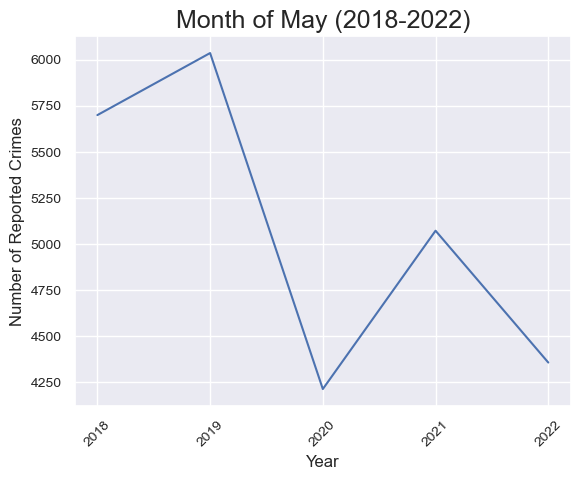

In [64]:
# Line plot for the number of crimes reported per Year in the month of May between 2018-2022. https://www.youtube.com/watch?v=yCgJGsg0Xa4 & https://www.youtube.com/watch?v=l-j9Mmi7VPk
may_month.Year.value_counts().sort_index().plot()
sns.set(style = 'darkgrid')
plt.xticks(np.arange(2018, 2023))
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Month of May (2018-2022)", fontsize=18)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Reported Crimes", fontsize=12)
plt.savefig("output_data/may_month.png")

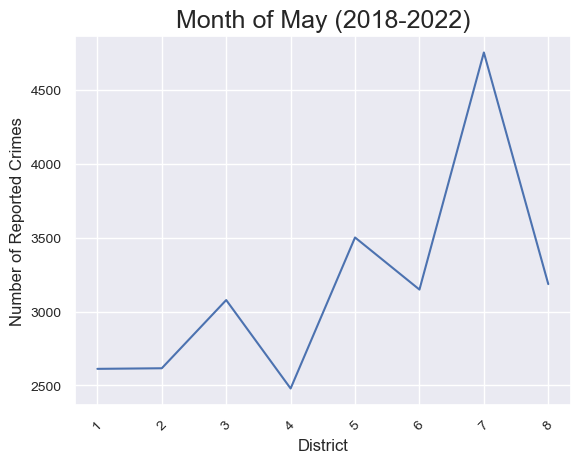

In [74]:
# Line plot for the number of crimes reported per District in the month of May between 2018-2022. https://www.youtube.com/watch?v=yCgJGsg0Xa4 & https://www.youtube.com/watch?v=l-j9Mmi7VPk
may_month.District.value_counts().sort_index().plot()
sns.set(style = 'darkgrid')
#plt.xticks(np.arange(2018, 2023))
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Month of May (2018-2022)", fontsize=18)
plt.xlabel("District", fontsize=12)
plt.ylabel("Number of Reported Crimes", fontsize=12)
plt.savefig("output_data/may_district.png")

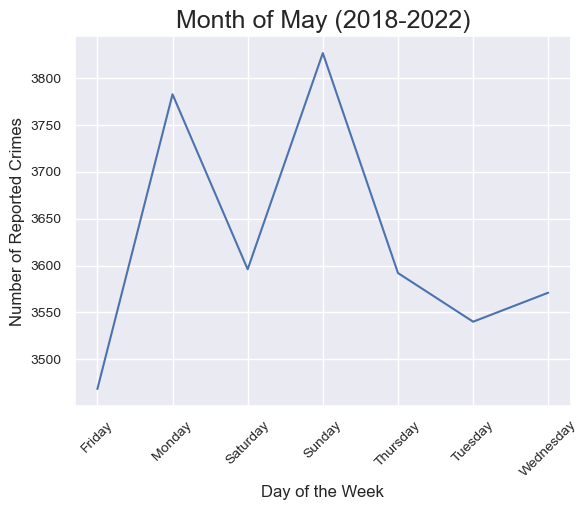

In [75]:
# Line plot for the number of crimes reported between 2018-2022. https://www.youtube.com/watch?v=yCgJGsg0Xa4 & https://www.youtube.com/watch?v=l-j9Mmi7VPk
may_month.Day_Of_Week.value_counts().sort_index().plot()
sns.set(style = 'darkgrid')
#plt.xticks(np.arange(2018, 2023))
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Month of May (2018-2022)", fontsize=18)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Reported Crimes", fontsize=12)
plt.savefig("output_data/may_day.png")

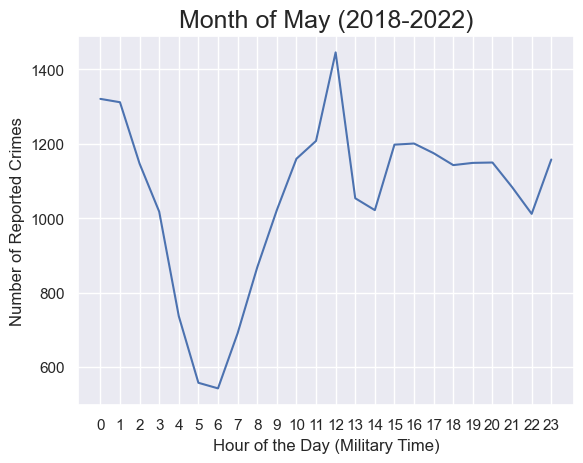

In [76]:
# Line plot for the number of crimes reported between 2018-2022. https://www.youtube.com/watch?v=yCgJGsg0Xa4 & https://www.youtube.com/watch?v=l-j9Mmi7VPk
may_month.Hour.value_counts().sort_index().plot()
sns.set(style = 'darkgrid')
plt.xticks(np.arange(0, 24))
plt.title("Month of May (2018-2022)", fontsize=18)
plt.xlabel("Hour of the Day (Military Time)")
plt.ylabel("Number of Reported Crimes")
plt.savefig("output_data/may_hour.png")

In [77]:
crime = reduced_crime_df.groupby(["Year"])["Month"].value_counts()
crime.head

<bound method NDFrame.head of Year  Month    
2018  July         5858
      May          5700
      June         5625
      October      5563
      December     5407
      August       5381
      April        5372
      September    5305
      March        5261
      February     5241
      November     5066
      January      4624
2019  May          6037
      March        5839
      April        5665
      August       5436
      January      5404
      September    5376
      June         5183
      July         5180
      October      5130
      February     5004
      November     4912
      December     2858
2020  October      4866
      February     4782
      August       4759
      November     4738
      September    4442
      July         4423
      March        4423
      June         4298
      December     4224
      May          4212
      April        4043
      January      3320
2021  May          5072
      July         4549
      June         4544
      October     

In [78]:
# Caclucate the percentage of crime by month for 2018-2022. https://www.statology.org/pandas-value_counts-percentage/
reduced_crime_df.Month.value_counts(normalize=True).mul(100).round(1).astype(str) + "%"

May          9.1%
March        8.7%
October      8.7%
July         8.6%
August       8.5%
June         8.5%
April        8.4%
February     8.3%
September    8.3%
November     8.1%
January      8.0%
December     6.7%
Name: Month, dtype: object

In [79]:
# Caclucate the percentage of crime by year.
reduced_crime_df.Year.value_counts(normalize=True).mul(100).round(1).astype(str) + "%"

2018    23.1%
2019    22.2%
2020    18.8%
2021    18.5%
2022    17.4%
Name: Year, dtype: object

In [80]:
# Caclucate the percentage of crime by hour for 2018-2022.
reduced_crime_df.Hour.value_counts(normalize=True).mul(100).round(1).astype(str) + "%"

12    5.8%
0     5.0%
1     5.0%
11    4.8%
15    4.8%
17    4.7%
10    4.7%
16    4.7%
20    4.6%
19    4.6%
18    4.5%
2     4.5%
21    4.4%
23    4.3%
13    4.1%
9     4.0%
14    4.0%
3     3.9%
22    3.8%
8     3.6%
4     2.9%
7     2.8%
5     2.2%
6     2.1%
Name: Hour, dtype: object

In [81]:
may_month.Year.value_counts().sort_index()

2018    5700
2019    6037
2020    4212
2021    5072
2022    4356
Name: Year, dtype: int64

In [82]:
may_month.Hour.value_counts().sort_index()

0     1321
1     1312
2     1147
3     1018
4      737
5      558
6      543
7      691
8      868
9     1022
10    1160
11    1208
12    1446
13    1054
14    1022
15    1198
16    1201
17    1175
18    1143
19    1149
20    1150
21    1084
22    1012
23    1158
Name: Hour, dtype: int64

In [83]:
may_month.Day_Of_Week.value_counts().sort_index()

Friday       3468
Monday       3783
Saturday     3596
Sunday       3827
Thursday     3592
Tuesday      3540
Wednesday    3571
Name: Day_Of_Week, dtype: int64